# 1. 線形回帰とは

線形回帰モデル (Linear Regression) とは、以下のような回帰式を用いて、説明変数の値から目的変数の値を予測するモデルです。

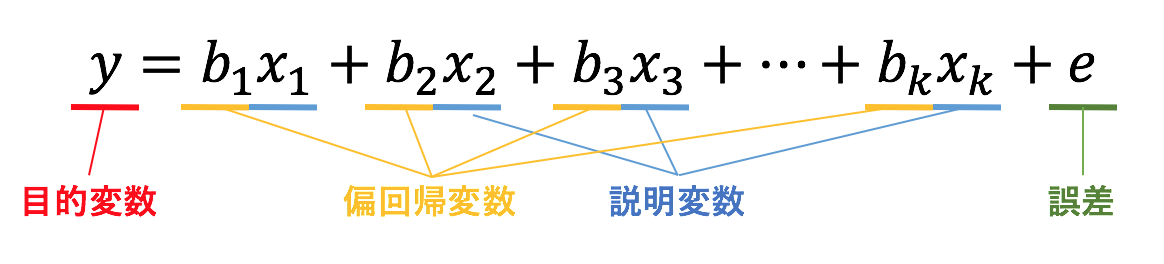

In [1]:
from IPython import display
display.Image("./linearregression3.png")

特に、説明変数が 1 つだけの場合**「単回帰分析」**と呼ばれ、説明変数が 2 変数以上で構成される場合**「重回帰分析」**と呼ばれます。

# 2. scikit-learn を用いた線形回帰
scikit-learn には、線形回帰による予測を行うクラスとして、`sklearn.linear_model.LinearRegression` が用意されています。

sklearn.linear_model.LinearRegression クラスの使い方

```python
sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False,
                                      copy_X=True, n_jobs=1)
```


`fit_intercept`	False に設定すると切片を求める計算を含めない。目的変数が原点を必ず通る性質のデータを扱うときに利用。 (デフォルト値: True)

`normalize`	True に設定すると、説明変数を事前に正規化します。 (デフォルト値: False)

`copy_X`	メモリ内でデータを複製してから実行するかどうか。 (デフォルト値: True)

`n_jobs`	計算に使うジョブの数。-1 に設定すると、すべての CPU を使って計算します。 (デフォルト値: 1)


# 3. scikit-learn を用いた線形回帰の実行例

「Wine Quality Data Set (ワインの品質)」の赤ワインのデータセットを利用します。

In [2]:
import pandas as pd
import numpy as np
from IPython.display import display
 
wine = pd.read_csv("winequality-red.csv", sep=";")
display(wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


データセットの各列は以下のようになっています。各行が 1 種類のワインを指し、1,599 件の評価結果データが格納されています。


| columns              | 日本語                  |   |   |   |
|----------------------|-------------------------------|---|---|---|
| fixed acidity        | 酒石酸濃度                    |   |   |   |
| volatile acidity     | 酢酸酸度                      |   |   |   |
| citric acid          | クエン酸濃度                  |   |   |   |
| residual sugar       | 残留糖濃度                    |   |   |   |
| chlorides            | 塩化物濃度                    |   |   |   |
| free sulfur dioxide  | 遊離亜硫酸濃度                |   |   |   |
| total sulfur dioxide | 亜硫酸濃度                    |   |   |   |
| density              | 密度                          |   |   |   |
| pH                   | pH                            |   |   |   |
| sulphates            | 硫酸塩濃度                    |   |   |   |
| alcohol              | アルコール度数                |   |   |   |
| quality              | 0-10 の値で示される品質のスコ |   |   |   |

### scikit-learn を用いた線形回帰の実行例: 単回帰分析

In [8]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

clf = linear_model.LinearRegression()

# 説明変数に "density (濃度)" を利用
X = wine.loc[:, ['sulphates']]
 
# 目的変数に "alcohol (アルコール度数)" を利用
Y = wine['quality']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
 
# 予測モデルを作成 using the training data
clf.fit(X_train, y_train)
 
print(clf)    
# 回帰係数
print(clf.coef_)
 
# 切片 (誤差)
print(clf.intercept_)

# 決定係数 on the test data
print(clf.score(X_test, y_test))


LinearRegression()
[1.09328753]
4.905601315161007
0.08419230278240786


In [11]:
print(y_train)

582     5
626     5
1030    7
620     5
490     6
       ..
1130    6
1294    6
860     5
1459    7
1126    6
Name: quality, Length: 1199, dtype: int64


結果より、以下のように回帰式が求められたことがわかります。

`[alcohol] = -272.28386973 × [density] + 281.82309339954367`

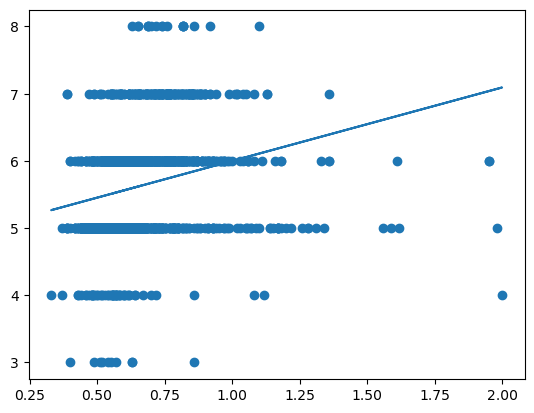

In [9]:
# matplotlib パッケージを読み込み
import matplotlib.pyplot as plt
 
# 散布図
plt.scatter(X, Y)
 
# 回帰直線
plt.plot(X, clf.predict(X))

### scikit-learn を用いた線形回帰の実行例: 重回帰分析

続いて、「quality」を目的変数に、「quality」以外を説明変数として、重回帰分析を行います。

In [34]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import pandas as pd

clf = linear_model.LinearRegression()

# 説明変数に "quality (品質スコア以外すべて)" を利用
wine_except_quality = wine.drop("quality", axis=1)
X = wine_except_quality
 
# 目的変数に "quality (品質スコア)" を利用
Y = wine['quality']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 予測モデルを作成 using the training data
clf.fit(X_train, y_train)

# 偏回帰係数
print(pd.DataFrame({"Name": X_train.columns,
                    "Coefficients": clf.coef_}).sort_values(by='Coefficients'))

# 切片 (誤差)
print(clf.intercept_)

# 決定係数 on the test data
print(clf.score(X_test, y_test))

                    Name  Coefficients
7                density    -10.351594
4              chlorides     -1.806503
1       volatile acidity     -1.001304
8                     pH     -0.393688
2            citric acid     -0.140821
6   total sulfur dioxide     -0.003644
5    free sulfur dioxide      0.005627
3         residual sugar      0.006564
0          fixed acidity      0.023085
10               alcohol      0.281890
9              sulphates      0.841172
14.355105195761805
0.40318034127962277


上記の結果からワインの品質スコアは、以下のような回帰式で表せることがわかります。
```
[quality] = -10.351594 × [density] + -1.806503 × [chlorides] +
            -1.001304 × [volatile acidity] + -0.393688 × [pH] +
            -0.140821 × [citric acid] + -0.003644 × [total sulfur dioxide] +
            0.005627 × [free sulfur dioxide] + 0.006564 × [residual sugar] +
            0.023085 × [fixed acidity] + 0.281890 × [alcohol] +
            0.841172 × [sulphates] + 14.355105195761805
```

In [35]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
 
# データフレームの各列を正規化
wine2 = wine.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
wine2.head()
 
# 説明変数に "quality (品質スコア以外すべて)" を利用
wine2_except_quality = wine2.drop("quality", axis=1)
X = wine2_except_quality
 
# 目的変数に "quality (品質スコア)" を利用
Y = wine2['quality']
 
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 予測モデルを作成 using the training data
clf.fit(X_train, y_train)

# 偏回帰係数
print(pd.DataFrame({"Name": X_train.columns,
                    "Coefficients": clf.coef_}).sort_values(by='Coefficients'))

# 切片 (誤差)
print(clf.intercept_)

# 決定係数 on the test data
print(clf.score(X_test, y_test))

                    Name  Coefficients
1       volatile acidity     -0.292381
4              chlorides     -0.216419
6   total sulfur dioxide     -0.206276
8                     pH     -0.099997
7                density     -0.028198
2            citric acid     -0.028164
3         residual sugar      0.019168
0          fixed acidity      0.052173
5    free sulfur dioxide      0.079908
9              sulphates      0.280951
10               alcohol      0.366456
-0.0013195679362396741
0.40318034127962166


In [36]:
print(clf.score(X, Y))

0.35965181118550926
